# Linear Regression using single feature

In [32]:
import pandas as pd



In [33]:
medical_df = pd.read_csv("insurance.csv")

In [34]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (10,6)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

## We know that smoker and age columns have the strongest correlation with charges , lets try to estimate the charges using the value of age for non-smokers

In [78]:
non_smoker_df = medical_df[medical_df.smoker == "no"]
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

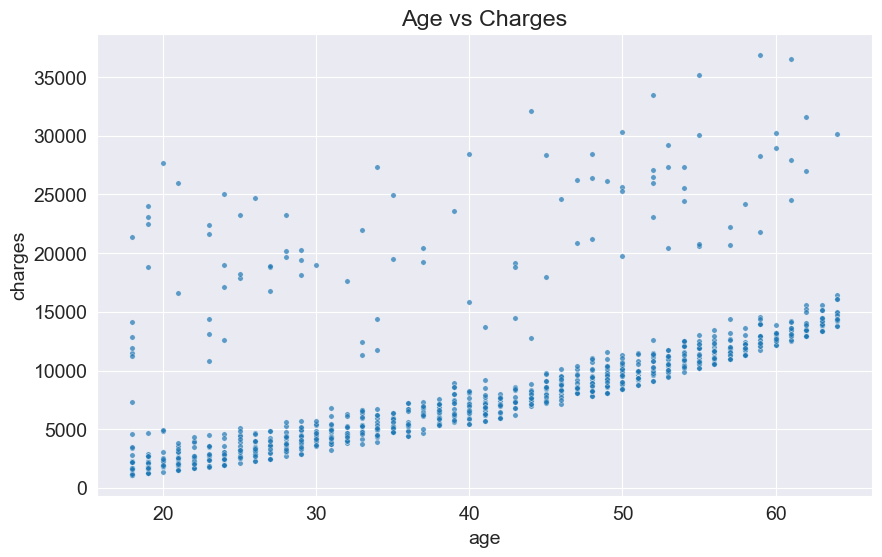

In [79]:
plt.title("Age vs Charges")
sns.scatterplot(data=non_smoker_df,x="age",y="charges",alpha=0.7,s=15)

 ### now we will try to plot a line that can represent above graph

In [38]:
def estimate_charges(x,w,b):
    return w*x + b

def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages,w,b)
    plt.plot(ages,estimated_charges,"r",alpha=0.9)
    plt.scatter(ages,target,s=8,alpha=0.8)
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.legend(["Estimate","Actual"])



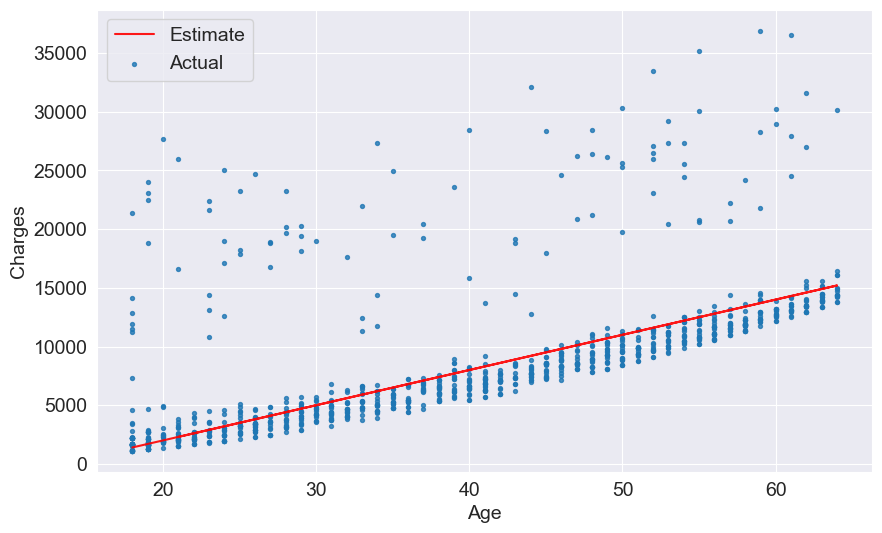

In [39]:
try_parameters(300,-4000)

In [40]:
w=300
b=-4000
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages,w,b)
estimated_charges

1        1400
2        4400
3        5900
4        5600
5        5300
        ...  
1332    11600
1333    11000
1334     1400
1335     1400
1336     2300
Name: age, Length: 1064, dtype: int64

# now we will find the error in our predicted values of charges using RMSE

1 for that we will first substract each value of prectication to actaul value

2 then square the difference i.e (residual) and add them up

3 then will find the average of it , and finallay we will
    we will root the final result.

In [41]:
import numpy as np


In [42]:
def  rmse(targets,predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

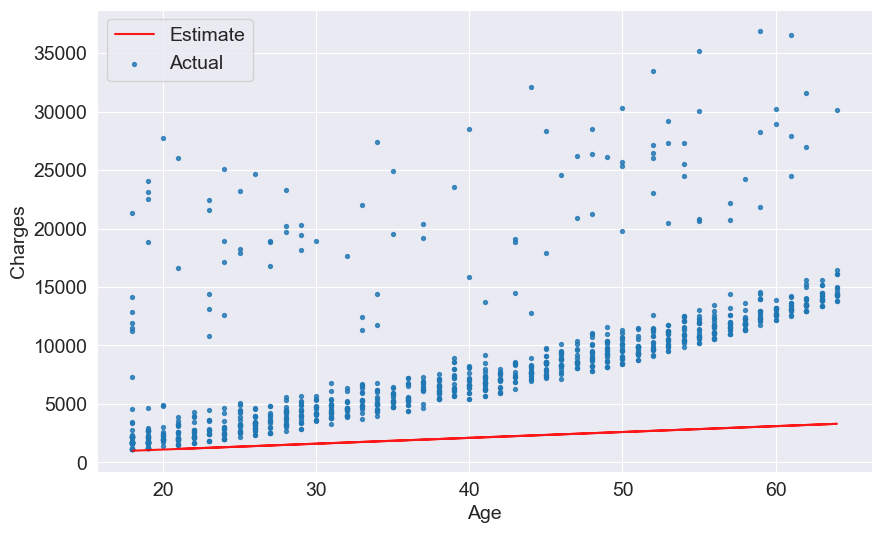

In [43]:
w = 50
b = 100
try_parameters(w,b)

In [44]:
targets = non_smoker_df["charges"]
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [45]:
predicted = estimate_charges(non_smoker_df.age,w,b)
predicted

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [46]:
rmse(targets,predicted)

np.float64(8461.949562575493)

In [47]:
def calculate_rmse(w,b):
    targets = non_smoker_df["charges"]
    predicted = estimate_charges(non_smoker_df.age,w,b)
    try_parameters(w,b)
    print(rmse(targets,predicted))
    

4725.9133994520325


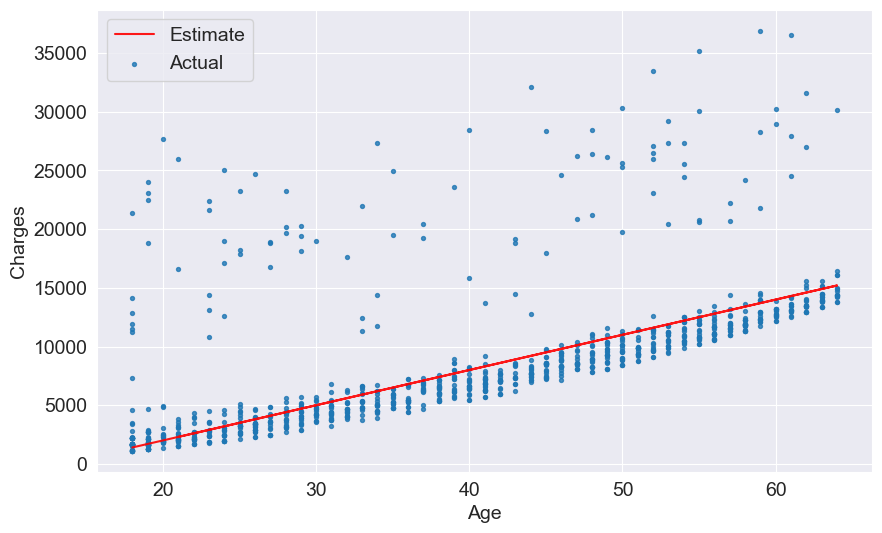

In [48]:
calculate_rmse(300,-4000)

# Optimizer

Next, we need to strategy to modify W,B to reduce the loss and improve the fit of the line to the data
    * Ordinary Least Square       -> best of smaller dataset 
    * Stochastic gradiant descent -> best for larger dataset

#### we will use linear_model fron scikit-learn


In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
model = LinearRegression()

In [51]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [52]:
inputs = non_smoker_df[["age"]]
targets = non_smoker_df.charges
print("inputs.shape : ",inputs.shape )
print("targets.shape : ",targets.shape )

inputs.shape :  (1064, 1)
targets.shape :  (1064,)


In [53]:
model.fit(inputs,targets)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [54]:
model.predict(np.array([[23],[37],[61]]))

C:\Users\zisha\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [55]:
model.predict(non_smoker_df[["age"]])

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [56]:
def model_prediction():
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = model.predict(non_smoker_df[["age"]])
    plt.plot(ages,estimated_charges,"r",alpha=0.9)
    plt.scatter(ages,target,s=8,alpha=0.8)
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.legend(["Estimate","Actual"])


    ## my previous predicted w,b

    ages = non_smoker_df.age
    target = non_smoker_df.charges
    estimated_charges = estimate_charges(ages,300,-4000)
    plt.plot(ages,estimated_charges,"g",alpha=0.9)


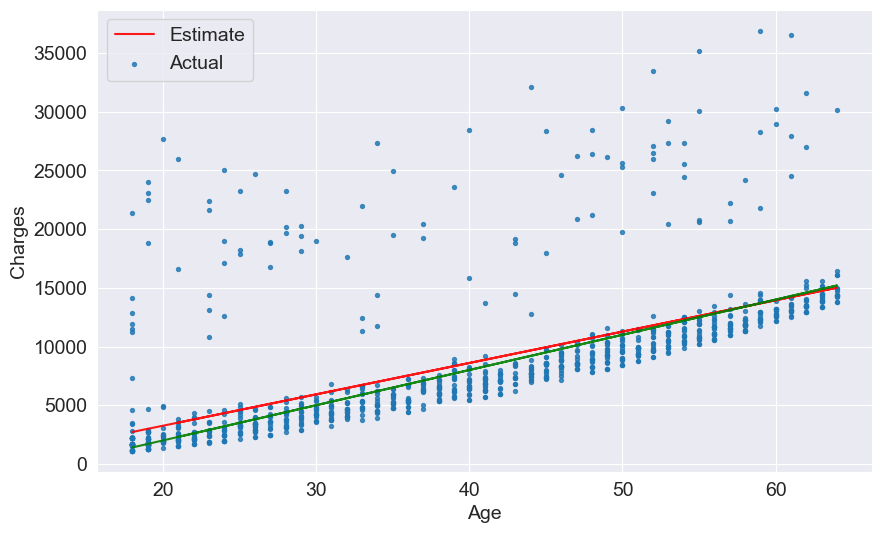

In [57]:
model_prediction()

In [58]:
def model_rmse():
    targets = non_smoker_df["charges"]
    predicted = model.predict(non_smoker_df[["age"]])
    print(rmse(targets,predicted))

In [61]:
model.coef_ # w 

array([267.24891283])

In [62]:
model.intercept_ # b

np.float64(-2091.4205565650864)

## right now its using Ordinary least Square method , but we can also 
## make it use SGDregression , too

In [64]:
from sklearn.linear_model import SGDRegressor

In [66]:
SDG_model = SGDRegressor()

In [67]:
SDG_model.fit(inputs,targets)

,"loss loss: str, default='squared_error'The loss function to be used. The possible values are 'squared_error','huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'The 'squared_error' refers to the ordinary least squares fit.'huber' modifies 'squared_error' to focus less on getting outlierscorrect by switching from squared to linear loss past a distance ofepsilon. 'epsilon_insensitive' ignores errors less than epsilon and islinear past that; this is the loss function used in SVR.'squared_epsilon_insensitive' is the same but becomes squared loss pasta tolerance of epsilon.More details about the losses formulas can be found in the:ref:`User Guide `.",'squared_error'
,"penalty penalty: {'l2', 'l1', 'elasticnet', None}, default='l2'The penalty (aka regularization term) to be used. Defaults to 'l2'which is the standard regularizer for linear SVM models. 'l1' and'elasticnet' might bring sparsity to the model (feature selection)not achievable with 'l2'. No penalty is added when set to `None`.You can see a visualisation of the penalties in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py`.",'l2'
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term. The higher thevalue, the stronger the regularization. Also used to compute thelearning rate when `learning_rate` is set to 'optimal'.Values must be in the range `[0.0, inf)`.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.Only used if `penalty` is 'elasticnet'.Values must be in the range `[0.0, 1.0]` or can be `None` if`penalty` is not `elasticnet`... versionchanged:: 1.7 `l1_ratio` can be `None` when `penalty` is not ""elasticnet"".",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method.Values must be in the range `[1, inf)`... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, training will stopwhen (loss > best_loss - tol) for ``n_iter_no_change`` consecutiveepochs.Convergence is checked against the training loss or thevalidation loss depending on the `early_stopping` parameter.Values must be in the range `[0.0, inf)`... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.Values must be in the range `[0, inf)`.",0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-insensitive loss functions; only if `loss` is'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.For 'huber', determines the threshold at which it becomes lessimportant to get the prediction exactly right.For epsilon-insensitive, any differences between the current predictionand the correct label are ignored if they are less than this threshold.Values must be in the range `[0.0, inf)`.",0.1
,"random_state random_state: int, RandomState instance, default=NoneUsed for shuffling the data, when ``shuffle`` is set to ``True``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None


In [68]:
def SDG_model_prediction():
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = SDG_model.predict(non_smoker_df[["age"]])
    plt.plot(ages,estimated_charges,"r",alpha=0.9)
    plt.scatter(ages,target,s=8,alpha=0.8)
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.legend(["Estimate","Actual"])


    ## my previous predicted w,b

    ages = non_smoker_df.age
    target = non_smoker_df.charges
    estimated_charges = estimate_charges(ages,300,-4000)
    plt.plot(ages,estimated_charges,"g",alpha=0.9)

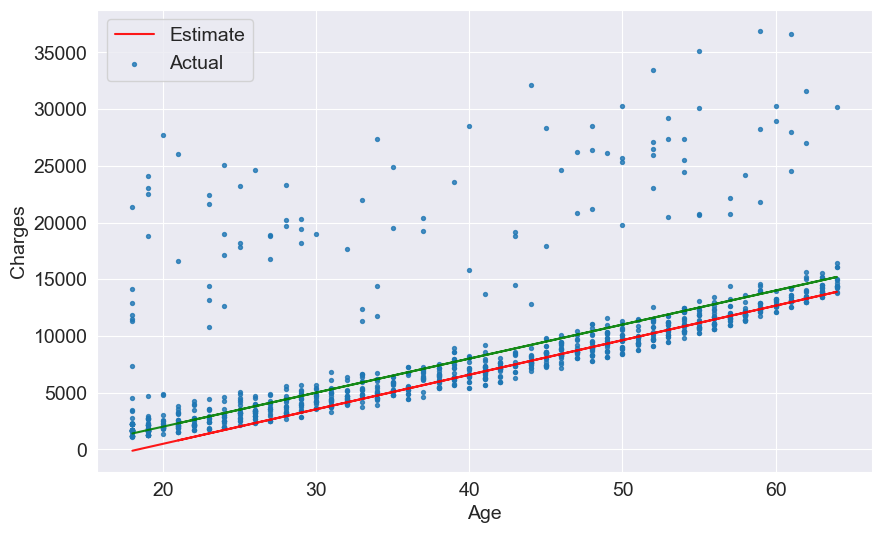

In [69]:
SDG_model_prediction()

In [70]:
def SDG_model_rmse():
    targets = non_smoker_df["charges"]
    predicted = SDG_model.predict(non_smoker_df[["age"]])
    print(rmse(targets,predicted))

In [71]:
SDG_model_rmse()

5117.767480865282


In [74]:
SDG_model.intercept_

array([-5606.01165156])

In [75]:
medical_df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### so even though the dataset seem large but for scikit its small thats why OLS beats the SDG 